In [167]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [187]:
def imshow(img,mode=0):#0表示灰度图，1表示彩色图
    plt.figure("Image")  # 图像窗口名称
    if mode==0:
        plt.imshow(img,cmap="gray")
    else:
        plt.imshow(img)
    plt.axis('on')  # 关掉坐标轴为 off
    plt.title('image')  # 图像题目
    # 必须有这个，要不然无法显示
    plt.show()

In [205]:
filename="./img02.jpg"
img = Image.open(filename)
print(img.mode,img.size,img.format)
#img = img.convert('L') # translate to  gray map   L = R * 299/1000 + G * 587/1000+ B * 114/1000
#img.show()
#print(img)

RGB (1200, 1200) JPEG


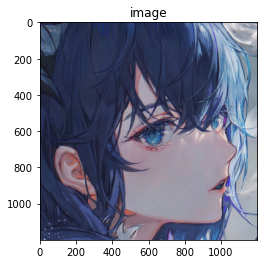

In [207]:
array = np.array(img)
imshow(array,1)

In [208]:
#手写convert('L')， L = R * 299/1000 + G * 587/1000+ B * 114/1000RGB转灰度图
h,w,_=array.shape
grayarray=np.zeros((h,w),dtype='int32')
for i in range(h):
    for j in range(w):
        grayarray[i][j]=round(array[i][j][0]*0.299+array[i][j][1]*0.587+array[i][j][2]*0.114)

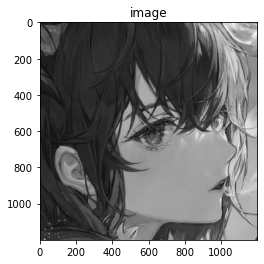

In [209]:
imshow(grayarray,0)

In [210]:
def ostu(image,threshold):
    sumT=np.sum(image)#求灰度值总和
    count=image.size#求图片的大小
    judge=image<threshold
    w0=np.sum(judge);#小于阈值的个数
    sum0=np.sum(judge*image);#求小于阈值的数值之和
    w1=count-w0
    if w0==0|w1==0:
        return 0;
    mean0=1.0*sum0/w0
    mean1=1.0*(sumT-sum0)/w1
    w0=1.0*w0/count
    w1=1.0*w1/count
    return 1.0*w0*w1*(mean0-mean1)*(mean0-mean1)
#print(ostu(grayarray,230))

In [211]:
class GA:
    def __init__(self,image,N=10,retain_rate=0.2,random_select_rate = 0.5,mutation_rate = 0.1):
        self.image=image
        self.N=N#种群的个体个数
        self.population=np.random.randint(0,256,self.N)#初始化
        self.retain_rate=retain_rate;#保留率，保留优秀的基因
        self.random_select_rate = random_select_rate#选择率
        self.mutation_rate = mutation_rate#变异率
        self.length=8;
    
    def fitness(self,threshold):
        return ostu(self.image,threshold)
        
    def selection(self):#进行选择
        graded=[(self.fitness(threshold),threshold) for threshold in self.population]
        graded=[x[1] for x in sorted(graded,reverse=True)]#按适应能力从小到大排序
        #选出适应性强的染色体
        print("阈值：",graded[0],"适应度",self.fitness(graded[0]))
        retain_length=round(len(graded)*self.retain_rate)+1;
        parents=graded[:retain_length]
        #选出适应性不强，但是幸存的染色体
        for chromosome in graded[retain_length:]:
            if np.random.random()<self.random_select_rate:
                parents.append(chromosome)
        return parents
    
    def crossover(self,parents):#交叉操作
        children=[]
        needelse=self.N-len(parents)
        while len(children)<needelse:
            male,female=np.random.choice(len(parents)-1, 2, replace=False)
            # 随机选取交叉点
            cross_pos=np.random.randint(0, self.length)
            #生成掩码
            mask=0
            for i in range(cross_pos):
                mask |=(1<<i)
            male=parents[male]
            female=parents[female]
            child=((male&mask))|(female&~mask)
            children.append(child)
        self.population=parents+children
        
    def mutation(self,rate):#变异
        for i in range(self.N):
            if np.random.random()<rate:
                j=np.random.randint(0,self.length-1)
                self.population[i]^=(1<<j)#随机取以一位异或
    
    def evolve(self):#进化
        parents=self.selection()
        self.crossover(parents)
        self.mutation(self.mutation_rate)
                
    
    def result(self):
        graded = [(self.fitness(chromosome), chromosome) for chromosome in self.population]
        graded = [x for x in sorted(graded, reverse=True)]
        return graded[0]
            

In [212]:
ga=GA(grayarray)
for x in range(30):
    ga.evolve()
#     print("res",res,"fitness",fitness)
#     print("-"*30)
x,y=ga.result()
    

D:\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


阈值： 112 适应度 2614.823209590889
阈值： 112 适应度 2614.823209590889
阈值： 112 适应度 2614.823209590889
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949


D:\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949
阈值： 106 适应度 2621.80194615949


In [213]:
maxtmp=0
maxindex=0
for i in range(256):
    tmp=ostu(grayarray,i)
    if(tmp>maxtmp):
        maxtmp=tmp
        maxindex=i
print(maxindex,maxtmp)

D:\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


106 2621.80194615949


D:\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [214]:
intensity_array = np.where(grayarray<y, 0, 255)
print(intensity_array)

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


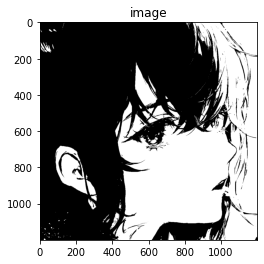

In [215]:
imshow(intensity_array)